In [1]:
!pip install skforecast
!pip install dask[dataframe]
!pip install skforecast
!pip install dask[dataframe]
!pip install lightgbm
!pip install matplotlib
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import joblib
import matplotlib.pyplot as plt
import warnings
import csv

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from sklearn.metrics import mean_squared_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import lightgbm as lgb
from skforecast.ForecasterAutoreg import ForecasterAutoreg
import csv
import matplotlib.dates as mdates

warnings.filterwarnings('once')

C:\Users\juanbaroffi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
steps = [5,10,15,20,25,30]
lags = [2,5,7,10]

In [4]:
data = pd.read_csv('../FitBit API Database/test_train_data_api_merged.csv')
print("Archivo : test_train_data_api_merged.csv")
print(data)

Archivo : test_train_data.csv
                Id                 Time   HeartRate  Intensity  Calories
0       2022484408  2016-04-12 07:21:00  101.600000          1   3.32064
1       2022484408  2016-04-12 07:22:00   87.888889          1   3.94326
2       2022484408  2016-04-12 07:23:00   58.000000          0   1.34901
3       2022484408  2016-04-12 07:24:00   58.000000          0   1.03770
4       2022484408  2016-04-12 07:25:00   56.777778          0   1.03770
...            ...                  ...         ...        ...       ...
333141  8877689391  2016-05-12 13:55:00   60.666667          0   1.33353
333142  8877689391  2016-05-12 13:56:00   61.875000          0   1.33353
333143  8877689391  2016-05-12 13:57:00   58.142857          0   1.33353
333144  8877689391  2016-05-12 13:58:00   61.200000          0   1.33353
333145  8877689391  2016-05-12 13:59:00   58.000000          0   1.33353

[333146 rows x 5 columns]


Archivo : test_train_data_api_merged.csv
            Id          

In [5]:
modelos = [
    ("LightGBM", lgb.LGBMRegressor(objective='regression', random_state=123)),
    ("XGBoost", XGBRegressor(random_state=123)),
    ("KNN", KNeighborsRegressor(n_neighbors=5)),
    ("RandomForest", RandomForestRegressor(n_estimators=100, max_depth=None, random_state=123)),
    ("MLP",MLPRegressor(random_state=123, max_iter=2000))
]


In [6]:
resultados = {}

for nombre_modelo, modelo in modelos:
    for step in steps:  

        datos_train = data.iloc[:-step]  
        datos_test  = data.iloc[-step:] 
        datos_train = datos_train.bfill()
        datos_test = datos_test.bfill()

        for lag in lags:
            forecaster = ForecasterAutoreg(
                regressor=modelo,
                lags=lag
            )
            forecaster.fit(y=datos_train['HeartRate'], exog=datos_train[['Calories', 'Steps', 'Distance']])
            predicciones = forecaster.predict(steps=step, exog=datos_test[['Calories', 'Steps', 'Distance']])
            error_mse = mean_squared_error(y_true=datos_test['HeartRate'], y_pred=predicciones)
            resultados[(nombre_modelo, step, lag)] = error_mse
            



nombre_archivo = "../resultados/resultados_modelos.csv"

with open(nombre_archivo, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Modelo', 'Steps', 'Lags', 'MSE'])
    for nombre_modelo, modelo in modelos:
        for step in steps:
            for lag in lags:
                error_mse = resultados[(nombre_modelo, step, lag)]
                # Escribir una fila en el archivo CSV
                writer.writerow([nombre_modelo, step, lag, error_mse])

print(f"Los resultados se han guardado en el archivo '{nombre_archivo}'.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 103102, number of used features: 5
[LightGBM] [Info] Start training from score 65.475316
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 103099, number of used features: 8
[LightGBM] [Info] Start training from score 65.475494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

Archivo : test_train_data_api_merged.csv
                         Id  Calories  Distance  HeartRate  Steps
Time                                                             
2024-06-27 00:00:00  BSGSML    1.6991    0.0000         75      0
2024-06-27 00:01:00  BSGSML    1.6991    0.0000         74      0
2024-06-27 00:02:00  BSGSML    4.4438    0.0216         77     29
2024-06-27 00:03:00  BSGSML    6.0122    0.0366         90     49
2024-06-27 00:04:00  BSGSML    5.2280    0.0052         92      7
...                     ...       ...       ...        ...    ...
2024-06-27 19:10:00  BSGSML    1.3070    0.0000         65      0
2024-06-27 19:11:00  BSGSML    1.6991    0.0000         66      0
2024-06-27 19:12:00  BSGSML    1.5684    0.0000         66      0
2024-06-27 19:13:00  BSGSML    1.5684    0.0000         67      0
2024-06-27 19:14:00  BSGSML    0.0000    0.0000         69      0

[1155 rows x 5 columns]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

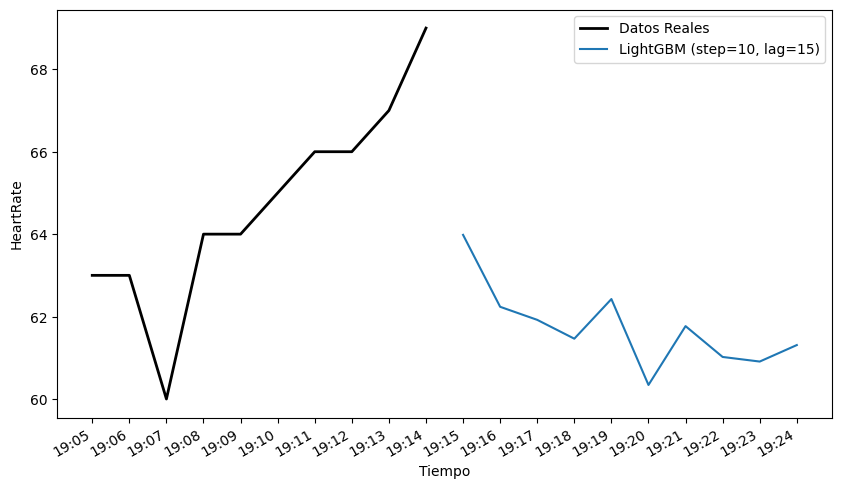

In [8]:
data = pd.read_csv('../app/app/DataAPI/BSGSML/test_train_data_api_merged.csv')
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)
print("Archivo : test_train_data_api_merged.csv")
print(data)

modelos = [
    ("LightGBM", lgb.LGBMRegressor(objective='regression', random_state=123))
]

steps = [10]  
lags = [15]   

resultados = {}
predicciones_dict = {}

def graficar_predicciones(datos_test, predicciones_dict, future_index, steps):
    fig, ax = plt.subplots(figsize=(10, 6))

    datos_test_last = datos_test.iloc[-steps:]
    
    ax.plot(datos_test_last.index, datos_test_last['HeartRate'], label='Datos Reales', color='black', linewidth=2)

    
    for (nombre_modelo, step, lag), predicciones in predicciones_dict.items():
        
        predicciones_aligned = pd.Series(predicciones.values, index=future_index)
        ax.plot(predicciones_aligned.index, predicciones_aligned, label=f'{nombre_modelo} (step={step}, lag={lag})')

    
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('HeartRate')
    ax.legend()
    plt.xticks(rotation=45)
    
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
    fig.autofmt_xdate()
    
    plt.show()

data = data.asfreq('T')

last_time = data.index[-1]

future_index = pd.date_range(start=last_time, periods=steps[0]+1, freq='T')[1:]

last_calories = data['Calories'].iloc[-1]
last_steps = data['Steps'].iloc[-1]
last_distance = data['Distance'].iloc[-1]

future_exog = pd.DataFrame({
    'Calories': [last_calories] * len(future_index),
    'Steps': [last_steps] * len(future_index),
    'Distance': [last_distance] * len(future_index)
}, index=future_index)

for nombre_modelo, modelo in modelos:
    for step in steps:  
        datos_train = data.iloc[:]  
        datos_train = datos_train.bfill()

        for lag in lags:
            forecaster = ForecasterAutoreg(
                regressor=modelo,
                lags=lag
            )
            forecaster.fit(y=datos_train['HeartRate'], exog=datos_train[['Calories', 'Steps', 'Distance']])
            predicciones = forecaster.predict(steps=step, exog=future_exog)
            predicciones_dict[(nombre_modelo, step, lag)] = predicciones
            graficar_predicciones(datos_train, predicciones_dict, future_index, step)